In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px

**This analysis is set to understand the characteristics of a diamond that are most likely to influence its price**

First, we need to explore our dataset

In [2]:
diamonds = pd.read_csv('../data/diamonds_train.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


**Columns meaning**

Price --> Price in US dollars \
Carat --> Weight of the diamond \
Cut --> Quality of the cut (Fair, Good, Very Good, Premium, Ideal)\
Color --> Diamond colour, from J (worst) to D (best)\
Clarity --> A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))\
x --> Length in mm \
y --> Width in mm \
z --> Depth in mm \
Depth --> Total depth percentage \
Table --> Width of top of diamond relative to widest point 

**Max, min and mean price**

In [3]:
print('Max value: ' + str(diamonds['price'].max()))
print('Min value: ' + str(diamonds['price'].min()))
print('Mean value: ' + str(diamonds['price'].mean()))

Max value: 18823
Min value: 326
Mean value: 3928.444469163268


In [4]:
diamonds.shape

(40455, 10)

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


**Searching for null values**

In [6]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
diamonds.value_counts()

carat  cut        color  clarity  depth  table  price  x     y     z   
0.79   Ideal      G      SI1      62.3   57.0   2898   5.90  5.85  3.66    4
0.32   Ideal      D      VVS1     61.8   56.0   1140   4.41  4.39  2.72    2
0.31   Ideal      H      IF       62.2   54.0   789    4.38  4.40  2.73    2
1.30   Very Good  F      SI2      61.1   58.0   6149   6.98  7.02  4.28    2
0.41   Premium    G      VS2      61.4   59.0   827    4.75  4.79  2.93    2
                                                                          ..
1.00   Premium    H      SI2      59.4   60.0   3360   6.55  6.49  3.87    1
                                                3080   6.49  6.40  3.83    1
                                  59.1   62.0   3640   6.50  6.47  3.83    1
                                  58.6   59.0   4088   6.57  6.50  3.83    1
0.20   Ideal      D      VS2      61.5   57.0   367    3.81  3.77  2.33    1
Length: 40366, dtype: int64

**1. Clarity** Let's convert this column into a scale for better understanding

In [8]:
clarity_values = {'I1': 0,'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

diamonds['clarity_scale'] = diamonds.clarity.apply(lambda x: clarity_values[x])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,3
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,4
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,2


**2. Color** Let's convert this column into a scale for better understanding

In [12]:
color_values = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

diamonds['color_scale'] = diamonds.color.apply(lambda x: color_values[x])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,3,0,5
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,2,4
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,4,3,2
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,6,1
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,2,3,0


**3. Cut** Let's convert this column into a scale for better understanding

In [14]:
cut_values = {'Ideal': 0, 'Good': 1, 'Fair': 2, 'Very Good': 4, 'Premium': 5}

diamonds['cut_scale'] = diamonds.cut.apply(lambda x: cut_values[x])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,3,0,5
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,2,4
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,4,3,2
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,6,1
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,2,3,0


There is not any negative values

In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154,3.049388,3.400766,2.318057
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062,1.648181,1.701260,2.185193
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000,2.000000,2.000000,0.000000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000,3.000000,3.000000,2.000000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000,4.000000,5.000000,5.000000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000,7.000000,6.000000,5.000000


The columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) representing a diamond that has lenght, width or depth of 0, **which is very strange since a diamond cannot have size 0**

Let's check the rows with 0 values in x, y, x columns

In [17]:
valx = diamonds['x'] == 0.0
valy = diamonds['y'] == 0.0
valz = diamonds['z'] == 0.0

diamonds_missing_values = diamonds[(valx & valy & valz)]
diamonds_missing_values.shape
#we have 4 rows without information for length, width and depth

diamonds_missing = diamonds[(valx | valy | valz)]
diamonds_missing.shape
#for one of them with 0.0 we have 16 rows

(16, 13)

We have 25 rows that have a value of 0 in some or all the afore mentioned columns. Most of them (16) are missing the z value, which we can obtain using the columns depth, x and y. 

25 rows with issues represent just 0.06% of our data (25 out of 40455) so it wouldn't be a big deal to remove them.

For those 16 rows, we will create a function that applies the formula given in the codebook and get the value of z.

In [27]:
#depth = 2 * z / (x + y)
def fix_z(row):
    if row['z'] == 0:
        return row['depth']*(row['x']+row['y'])/200
    else:
        return row

In [28]:
diamonds[diamonds['z'] == 0.0].apply(fix_z,axis=1)

1606     3.839120
3945     5.006595
6465     0.000000
13839    5.662250
14815    2.038960
14891    5.031180
16425    5.137740
19856    3.850365
21602    4.058160
24795    4.085550
26192    0.000000
26978    3.852030
28029    0.000000
34423    0.000000
34504    4.540800
34601    5.192110
dtype: float64

In [30]:
diamonds['z'].replace(0.0, np.nan,inplace=True)
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40439.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.538553,3.049388,3.400766,2.318057
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.693639,1.648181,1.701260,2.185193
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000,2.000000,2.000000,0.000000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000,3.000000,3.000000,2.000000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000,4.000000,5.000000,5.000000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000,7.000000,6.000000,5.000000


In [31]:
diamonds['z'].isna().sum()
diamonds.dropna(inplace=True)
diamonds.shape

(40439, 13)

**Managing outliers** over 75%

In [34]:
q3 = np.quantile(diamonds['price'], 0.75)
diamonds[diamonds['price']>q3].head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
5,1.52,Ideal,F,SI2,61.2,57.0,9057,7.45,7.39,4.54,1,4,0
7,1.52,Ideal,J,VS1,62.3,58.0,8608,7.32,7.35,4.57,4,0,0
9,1.14,Ideal,G,SI1,61.7,56.0,6741,6.71,6.75,4.15,2,3,0
13,1.51,Premium,G,VS1,60.1,58.0,14507,7.48,7.45,4.49,4,3,5
14,1.65,Ideal,H,SI2,61.6,55.0,10349,7.58,7.62,4.68,1,2,0


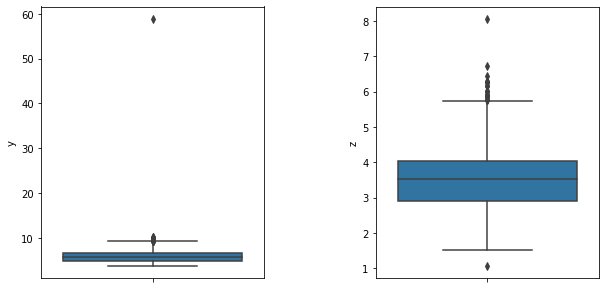

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
axes[1] = sns.boxplot(y=diamonds.z,ax=ax[1])
plt.subplots_adjust(wspace=0.5)

One big outlier in y and one in z. According to graph, max values for y should be 10 and almost 6 in z. Let's filter our dataset to find those outliers

In [48]:
diamonds[diamonds['z'] > 7]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
14708,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,1,2,5


In [51]:
diamonds['z'].loc[14708] = 0
diamonds['z'].loc[14708] = fix_z(diamonds.loc[14708])

In [52]:
diamonds.loc[14708]

carat                  2
cut              Premium
color                  H
clarity              SI2
depth               58.9
table                 57
price              12210
x                   8.09
y                   58.9
z                19.7286
clarity_scale          1
color_scale            2
cut_scale              5
Name: 14708, dtype: object

In [53]:
diamonds[diamonds['y']>10]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
3468,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.170000,0,1,5
14708,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,19.728555,1,2,5
31083,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.720000,0,0,2


In [54]:
def fix_y(row):
    if row['y'] == 0:
        return (200*row['z']/row['depth'])-row['x']
    else:
        return row

In [56]:
diamonds['y'].loc[3468]=0
diamonds['y'].loc[14708]=0
diamonds['y'].loc[31083]=0

diamonds['y'].loc[24067] = fix_y(diamonds.loc[3468])
diamonds['y'].loc[25998] = fix_y(diamonds.loc[14708])
diamonds['y'].loc[27415] = fix_y(diamonds.loc[31083])

In [57]:
diamonds[diamonds['y']>10] 

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale,cut_scale
24067,1.01,Ideal,E,VS1,62.7,55.0,7665,6.45,10.089508,4.03,4,5,0
25998,0.31,Very Good,G,VVS2,63.2,58.0,907,4.32,58.900000,2.71,5,3,4
27415,1.22,Ideal,G,VVS2,60.0,58.0,11003,6.95,10.195532,4.18,5,3,0


In [58]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat               0.64
depth               1.50
table               3.00
price            4384.50
x                   1.83
y                   1.82
z                   1.13
clarity_scale       2.00
color_scale         3.00
cut_scale           5.00
dtype: float64


In [59]:
diamonds_outliers = (diamonds < (Q1 - 1.5 * IQR)) |(diamonds > (Q3 + 1.5 * IQR))
diamonds_outliers[diamonds_outliers==True]

,carat,clarity,clarity_scale,color,color_scale,cut,cut_scale,depth,price,table,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40451,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
40452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


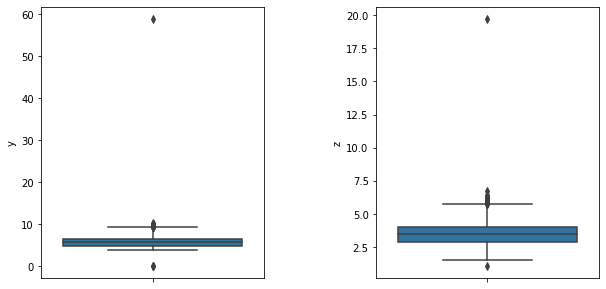

In [60]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**We still have the outlier on the 19**

Finding insights in this dataset

In [65]:
diamonds.to_csv('../data/diamonds_clean.csv')

In [48]:
# Cut is one of the most relevant aspects of a diamond -- It's the bigger indicator of beauty
diamonds_df['cut'].unique()
cut_prices = diamonds_df[['cut','price']].groupby('cut', as_index=False).agg('mean')
cut_prices.sort_values(by='price', ascending=False)

"""Surpisingly, Fair cut is the second most valuable diamond, 
surpassing Very Good or Ideal. 
Probably this would be linked to other aspects of the diamond: 
clarity or color"""

'Surpisingly, Fair cut is the second most valuable diamond, \nsurpassing Very Good or Ideal. \nProbably this would be linked to other aspects of the diamond: \nclarity or color'

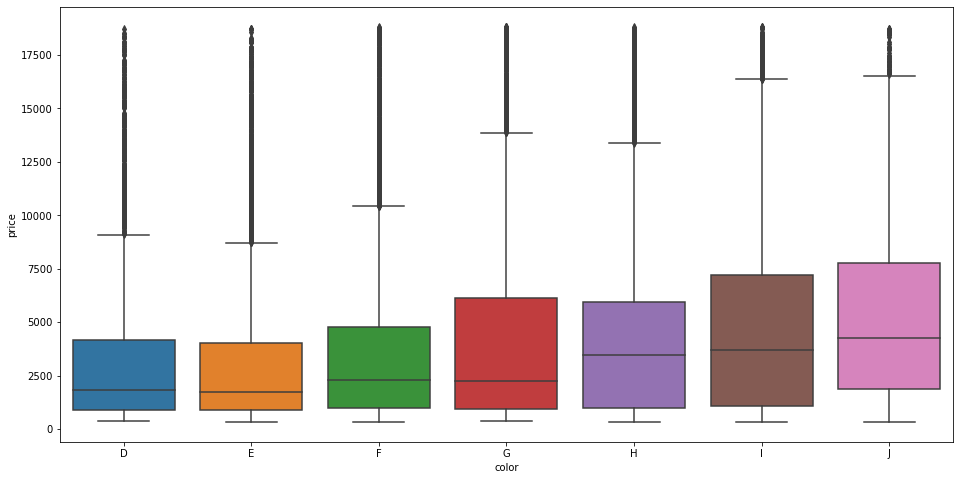

In [8]:
# Best color is D (whiter) and worst color is J (colorless)
diamonds_df['color'].unique()
fig = plt.figure(figsize=(16,8))
ax = sns.boxplot(x="color", y="price", data=diamonds_df.sort_values("color"));

In [9]:
"""Types of clarity (best to worst): 
IF (Internally Flawless), 
VVS1 (Very, Very Slightly Included 1), 
VVS2 (Very, Very Slightly Included 2), 
VS1 (Very Slightly Included 1), 
VS2 (Very Slightly Included 2), 
SI1 (Slightly Included 1), 
SI2 (Slightly Included 2) and 
I1 (Inclusions 1)"""
diamonds_df['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [10]:
# It is a relevant asset when it is combined by the rest of C's
diamonds_df['carat'].unique()

array([1.21, 0.32, 0.71, 0.41, 1.02, 1.52, 1.01, 0.31, 1.14, 0.44, 0.93,
       1.51, 1.65, 1.5 , 0.43, 0.38, 0.85, 1.53, 1.54, 0.3 , 1.3 , 1.  ,
       0.9 , 1.55, 1.16, 0.35, 0.97, 1.19, 0.7 , 0.8 , 2.  , 0.5 , 0.51,
       1.04, 0.64, 0.78, 0.52, 0.33, 0.47, 1.59, 0.34, 0.74, 1.08, 0.79,
       1.33, 0.58, 1.22, 1.62, 0.55, 1.64, 1.1 , 1.03, 0.56, 1.13, 0.91,
       1.24, 2.3 , 0.27, 0.36, 1.77, 1.06, 1.27, 0.92, 2.01, 1.83, 0.23,
       0.77, 2.07, 1.11, 1.56, 0.96, 2.25, 1.18, 1.72, 0.59, 0.57, 0.72,
       0.4 , 0.42, 1.36, 1.15, 0.54, 1.86, 1.41, 0.75, 2.22, 1.23, 0.88,
       1.25, 0.28, 1.82, 1.37, 1.2 , 1.05, 0.39, 0.6 , 0.76, 0.25, 0.73,
       0.53, 0.63, 2.53, 0.65, 0.62, 1.4 , 1.7 , 0.83, 1.17, 0.46, 1.26,
       1.58, 2.13, 0.24, 1.07, 2.04, 0.45, 1.09, 2.05, 1.31, 0.29, 0.84,
       1.12, 0.81, 2.75, 0.22, 0.66, 1.74, 1.57, 1.29, 1.69, 0.49, 2.24,
       2.02, 0.61, 1.32, 1.87, 0.37, 0.67, 1.73, 0.82, 1.46, 1.71, 0.26,
       2.64, 2.14, 2.33, 2.03, 1.35, 2.57, 1.39, 1.

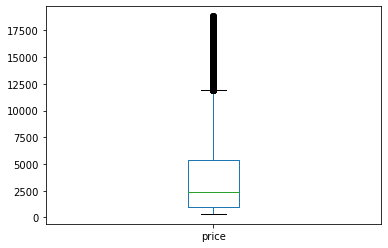

In [11]:
# Let's see the price behaviour
prices = diamonds_df['price']
prices.plot(kind='box');

# Plenty of outliers from 12.5K to 17.5K

In [12]:
prices.describe()

count    40455.000000
mean      3928.444469
std       3992.416147
min        326.000000
25%        945.000000
50%       2397.000000
75%       5331.000000
max      18823.000000
Name: price, dtype: float64

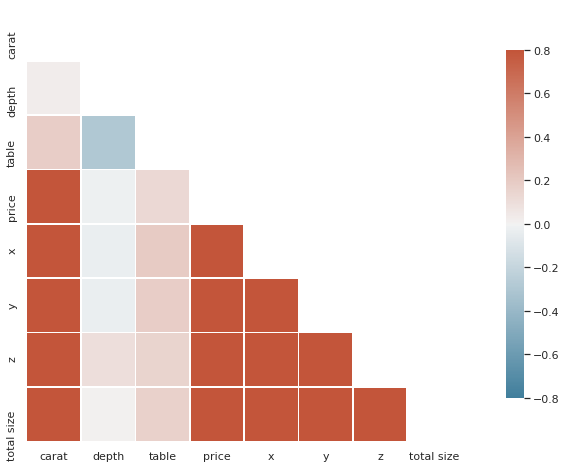

'Price has a strong correlation with carat, and the size of the diamond (x, y, z)'

In [13]:
#Let's see the correlation between the elements and the price
sns.set_theme(style="white")
diamonds_df['total size'] = diamonds_df['x'] * diamonds_df['y'] * diamonds_df['z']
corr = diamonds_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(16, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, vmin=-.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.show();
"""Price has a strong correlation with carat, and the size of the diamond (x, y, z)"""

In [14]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,total size
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975


In [15]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

diamonds_df['carat_bin'] = pd.cut(diamonds_df['carat'], bins)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,total size,carat_bin
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725,"(1.0, 1.5]"
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750,"(0.0, 0.5]"
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890,"(0.5, 1.0]"
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800,"(0.0, 0.5]"
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975,"(1.0, 1.5]"


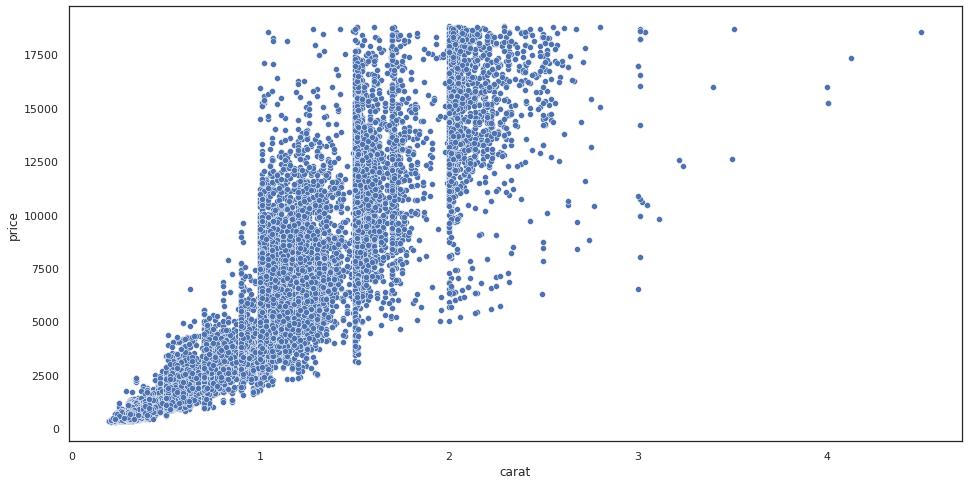

'Positive correlation: higher carat value, more expensive diamond'

In [16]:
# Let's see how is the correlation (positive or negative) of carat and differents diamond sizes
fig = plt.figure(figsize=(16,8))
ax = sns.scatterplot(x = diamonds_df['carat'], y = diamonds_df['price'])
plt.show();

"""Positive correlation: higher carat value, more expensive diamond"""

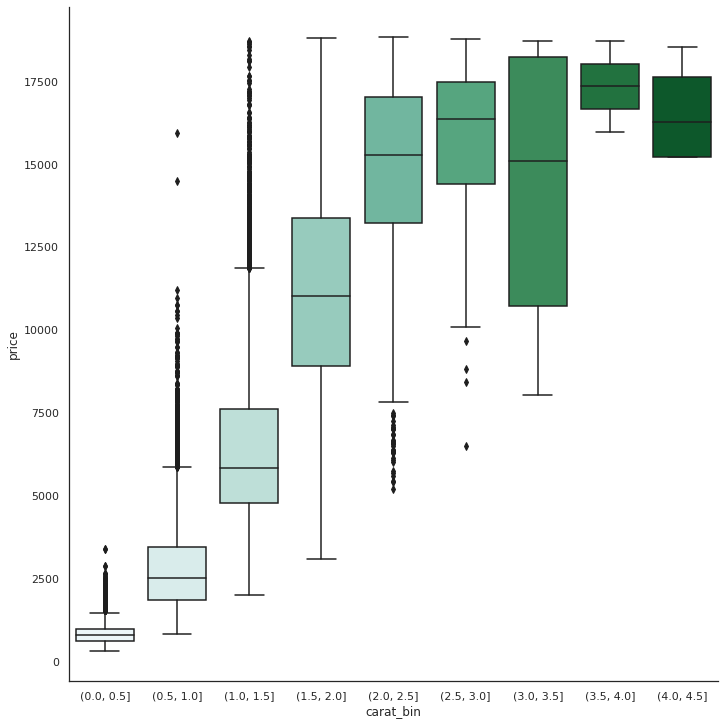

In [17]:
sns.catplot(x = 'carat_bin', y='price', kind='box', data=diamonds_df, height=10, palette='BuGn');